(path-analysis-notebook)=
# Path analysis

<!-- https://stats.oarc.ucla.edu/r/seminars/rsem/ -->

In [71]:
# devtools::install_github("alishinski/lavaanPlot")
source("_common.R")
suppressPackageStartupMessages({
    library("lavaan")
    library("semPlot")
    library("lavaanPlot")
    library("lavaanExtra")
    library("DiagrammeRsvg")
    library("rsvg")
})

set.seed(42)
options(repr.plot.width=6, repr.plot.height=6)

Le visualizzazioni rivestono un ruolo fondamentale nel comunicare in modo chiaro e sintetico le intricate relazioni tra variabili. Questo è particolarmente evidente quando si opera con modelli di equazioni strutturali (SEM) che delineano una rete di interconnessioni tra variabili sia osservabili che latenti. In tali contesti, i ricercatori frequentemente si avvalgono di strumenti grafici per agevolare la specificazione e l'esplicitazione del modello, oltre che per presentare in maniera comprensibile i risultati ottenuti.

L'analisi del percorso, comunemente denominata "path analysis," costituisce una metodologia finalizzata alla disassemblaggio della correlazione o covarianza esistente tra variabili, con l'obiettivo di rivelare e descrivere le intricate relazioni tra di esse. Questo approccio si fonda sulla creazione di rappresentazioni grafiche che evidenziano le interrelazioni tra le variabili, offrendo una visualizzazione visuale di come i diversi fattori si influenzino reciprocamente. Inoltre, l'analisi del percorso prevede una scomposizione delle correlazioni o covarianze utilizzando i parametri del modello, trasformando dati complessi in una struttura più comprensibile.

Sewall Wright, un genetista che operava presso il Dipartimento dell'Agricoltura degli Stati Uniti, fu il precursore nello sviluppo dei diagrammi di percorso per descrivere i modelli di equazioni strutturali già negli anni '20 del secolo scorso. Questa sua innovazione ha permesso di ottenere una rappresentazione visiva delle connessioni tra variabili, aprendo la strada all'analisi del percorso.

Con il trascorrere del tempo, questa metodologia è stata adottata con successo come uno strumento efficace per discriminare gli effetti diretti da quelli indiretti nelle relazioni tra variabili. Inoltre, essa si è dimostrata di grande utilità nel valutare la solidità e la validità delle relazioni causali ipotizzate all'interno dei modelli di equazioni strutturali.

## Path diagram

Il diagramma del percorso, noto anche come "path diagram," costituisce uno strumento per la rappresentazione grafica delle relazioni tra variabili all'interno di un modello. All'interno di questo diagramma, le variabili latenti o non osservate sono rappresentate mediante cerchi o ellissi, mentre le variabili osservate sono rappresentate da quadrati o rettangoli. 

All'interno del path diagram, è possibile individuare due categorie di variabili: quelle che subiscono influenze da parte di altre variabili nel sistema e quelle che svolgono il ruolo di generatori di effetti. Nello specifico, le variabili esogene costituiscono elementi esterni al sistema in esame, operando in qualità di variabili indipendenti che generano effetti causalmente. Al contrario, le variabili endogene possono agire sia come risultati di altre variabili che come cause per ulteriori variabili, oppure possono essere strettamente variabili dipendenti. Le origini causali delle variabili endogene trovano collocazione all'interno del path diagram, mentre quelle delle variabili esogene si trovano esternamente al diagramma. Tale distinzione presenta affinità con la distinzione tra variabili indipendenti e dipendenti all'interno dei modelli lineari.

Il diagramma di percorso mette in evidenza le interazioni tra le variabili d'interesse, sottolineando i legami causali o associativi che le connettono. Le frecce unidirezionali illustrano relazioni causali: una variabile subisce influenza da un'altra variabile collegata attraverso una freccia. Invece, le frecce curve bidirezionali denotano relazioni associative, senza implicare una causalità diretta tra le variabili. L'assenza di una freccia tra due variabili nel diagramma suggerisce l'assenza di correlazione tra di esse. Nel caso esemplificato, si illustrano le relazioni tra nove variabili osservate e tre variabili latenti mediante il path diagram.

```{figure} images/path_01.png
---
height: 450px
name: path_01-fig
---
Diagramma di percorso per un modello a tre fattori comuni.
```

## Analisi dei percorsi e regressione bivariata

Cominciamo esaminando l'analisi dei percorsi partendo dall'esempio più semplice, ovvero il modello di regressione lineare. Il modello di regressione bivariata si esprime tramite l'equazione seguente:

\[ y_1 = b_0 + b_1 x_1 + \epsilon_1 \]

Dove \( y \) rappresenta la variabile dipendente, \( b_0 \) rappresenta l'intercetta, \( b_1 \) rappresenta la pendenza della retta di regressione, \( x \) è la variabile indipendente e \( \epsilon \) è il termine di errore.

Nell'ambito della descrizione delle relazioni tra variabili manifeste e latenti, si adotta spesso la notazione LISREL. In questa notazione, il modello presentato in precedenza può essere espresso come segue:

\[ y_1 = \alpha + \gamma x_1 + \zeta_1 \]

Dove:

- \( x_1 \): variabile esogena singola
- \( y_1 \): variabile endogena singola
- \( \alpha \): intercetta di \( y_1 \)
- \( \gamma_1 \): coefficiente di regressione
- \( \zeta_1 \): termine di errore di \( y_1 \)
- \( \phi \): varianza o covarianza della variabile esogena
- \( \psi \): varianza o covarianza residuale della variabile endogena

Il diagramma di percorso per il modello di regressione bivariata è illustrato nella figura sottostante.

```{figure} images/lisrel_bivariate_reg.png
---
height: 225px
name: lisrel_bivariate_reg-fig
---
Diagramma di percorso per il modello di regressione bivariato.
```

Facciamo un esempio numerico. Simuliamo tre variabili: x1, x2, y.

In [2]:
set.seed(42)
n <- 100
x1 <- rnorm(n, 90, 20)
x2 <- x1 + rnorm(n, 0, 30)
y <- 25 + 0.5 * x1 + 1.0 * x2 + rnorm(n, 0, 30)

cor(cbind(x1, x2, y))

dat <- data.frame(
    y, x1, x2
)

,x1,x2,y
x1,1.0000000,0.6244502,0.5493286
x2,0.6244502,1.0000000,0.7992614
y,0.5493286,0.7992614,1.0000000


Consideriamo la relazione tra `x1` (variabile endogena) e `y` (variabile endogena). In R possiamo adattare ai dati un modello di regressione mediante la funzione `lm`.

In [3]:
m1a <- lm(y ~ x1, data = dat)
summary(m1a) |>
    print()


Call:
lm(formula = y ~ x1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.462 -29.539  -3.437  29.200 122.234 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.5974    18.9844   1.980   0.0505 .  
x1            1.3286     0.2042   6.508 3.25e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.31 on 98 degrees of freedom
Multiple R-squared:  0.3018,	Adjusted R-squared:  0.2946 
F-statistic: 42.35 on 1 and 98 DF,  p-value: 3.251e-09



Usiamo ora lavaan per adattare lo stesso modello ai dati.

In [4]:
m1b <- "
    y ~ 1 + x1
    x1 ~~ x1
"
fit1b <- sem(m1b, data = dat)
parameterEstimates(fit1b) |>
    print()


  lhs op rhs      est      se      z pvalue ci.lower ci.upper
1   y ~1       37.597  18.794  2.001  0.045    0.763   74.432
2   y  ~  x1    1.329   0.202  6.574  0.000    0.933    1.725
3  x1 ~~  x1  429.432  60.731  7.071  0.000  310.402  548.462
4   y ~~   y 1754.100 248.067  7.071  0.000 1267.897 2240.303
5  x1 ~1       90.650   2.072 43.744  0.000   86.589   94.712


L'intercetta di `.y` (37.597) e il coefficiente di regressione di `y ~ x1` (1.329) corrispondono all'output di `lm()` con piccoli errori di arrotondamento. Si noti che il punto (.) davanti al parametro indica una variabile endogena sotto `Intercepts` e una varianza residua se sotto `Variances` o `Covariances`. L'intercetta per `x1` (90.650) non ha un punto (.) né la sua varianza (429.432), indicando che si tratta di una media ed una varianza esogena. La media ed la varianza esogene corrispondono alla media e alla varianza univariate come mostrato di seguito:

In [7]:
mean(dat$x1)

[1] 90.6503

In [9]:
var(dat$x1) * (length(dat$x1) - 1) / length(dat$x1)

[1] 429.432

La funzione `semPaths` consente di creare un diagramma di percorso a partire dall'oggetto creato da `sem`.

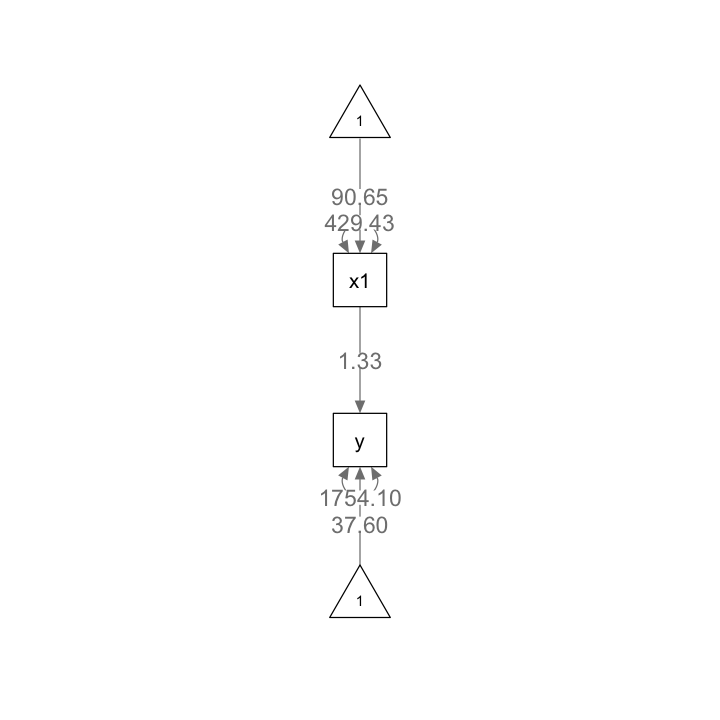

In [20]:
semPlot::semPaths(
    fit1b,
    layout = "tree", sizeMan = 7, sizeInt = 5, style = "ram", 
    residuals = TRUE, intAtSide = FALSE, edge.label.cex = 1.15,
    whatLabels = "est", nCharNodes = 0, normalize = FALSE
)


## Analisi dei percorsi e regressione multipla

<!-- Vi è una stretta relazione tra path analysis e regressione multipla,
tanto che la regressione può essere considerata un caso particolare di
path analysis. Per semplicità, si supponga che le variabili siano state
standardizzate, anche se la stessa analisi può essere condotta per
variabili grezze. Il path diagram mostra la relazione tra tutte le
variabili, comprendendo anche i fattori di disturbo, e fornisce dunque
la rappresentazione grafica di un sistema di equazioni simultanee. Nel
caso di due regressori, il modello di regressione multipla può essere
rappresentato tramite il path diagram riportato nella
figura seguente. -->

La regressione semplice è limitata a una sola variabile esogena. Nella pratica, un ricercatore può essere interessato a studiare come un gruppo di variabili esogene possano predire una variabile di esito. Supponiamo di avere ancora una sola variabile di esito endogena ma due predittori esogeni; questo caso è noto come regressione multipla:

$$
y_1 = \alpha_1 + \gamma_1 x_1 + \gamma_2 x_2 + \zeta_1
$$

Il diagramma di percorso mostra la relazione tra tutte le variabili, comprendendo anche i fattori di disturbo, e fornisce dunque la rappresentazione grafica dell'equazione precedente.

```{figure} images/lisrel_mr.png
---
height: 300px
name: lisrel_mr-fig
---
Diagramma di percorso per il modello di regressione multipla.
```

I coefficienti di percorso associati alle frecce orientate esprimono la portata del nesso causale e corrispondono ai pesi beta (ovvero ai coefficienti parziali di regressione standardizzati). Le frecce non orientate esprimono la portata della pura associazione tra variabili e dunque corrispondono alle correlazioni/covarianze.

In un diagramma di percorso, il numero di equazioni corrisponde al numero di variabili endogene del modello. Nel caso specifico, poiché vi è una sola variabile endogena (ovvero $y$), esiste un'unica equazione che descrive le relazioni causalitiche interne al path diagram. All'interno di ciascuna equazione, inoltre, il numero di termini corrisponde al numero di frecce orientate che puntano verso la variabile endogena. Nell'esempio sopra citato, pertanto, la sola equazione del modello contiene tre termini, ciascuno associato ad una freccia orientata.

Usando `lm` otteniamo la seguente stima dei coefficienti:

In [5]:
m2a <- lm(y ~ 1 + x1 + x2, data = dat)
fit2a <- summary(m2a) |>
    print()


Call:
lm(formula = y ~ 1 + x1 + x2, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.299 -19.856  -2.476  19.112  75.617 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  44.4537    13.6639   3.253  0.00157 ** 
x1            0.1991     0.1879   1.060  0.29179    
x2            1.0853     0.1127   9.628 8.54e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.41 on 97 degrees of freedom
Multiple R-squared:  0.643,	Adjusted R-squared:  0.6356 
F-statistic: 87.34 on 2 and 97 DF,  p-value: < 2.2e-16



Gli stessi risultati si ottengono con lavaan.

In [6]:
m2b <- "
    y ~ 1 + x1 + x2
    x1 ~~ x1
    x2 ~~ x2
    x1 ~~ x2
"
fit2b <- sem(m2b, data = dat)
parameterEstimates(fit2b) |>
    print()


  lhs op rhs      est      se      z pvalue ci.lower ci.upper
1   y ~1       44.454  13.457  3.303  0.001   18.078   70.830
2   y  ~  x1    0.199   0.185  1.076  0.282   -0.164    0.562
3   y  ~  x2    1.085   0.111  9.775  0.000    0.868    1.303
4  x1 ~~  x1  429.432  60.731  7.071  0.000  310.402  548.462
5  x2 ~~  x2 1192.840 168.693  7.071  0.000  862.208 1523.472
6  x1 ~~  x2  446.927  84.379  5.297  0.000  281.546  612.307
7   y ~~   y  896.963 126.850  7.071  0.000  648.342 1145.584
8  x1 ~1       90.650   2.072 43.744  0.000   86.589   94.712
9  x2 ~1       88.026   3.454 25.487  0.000   81.257   94.795


Esaminiamo il diagramma di percorso.

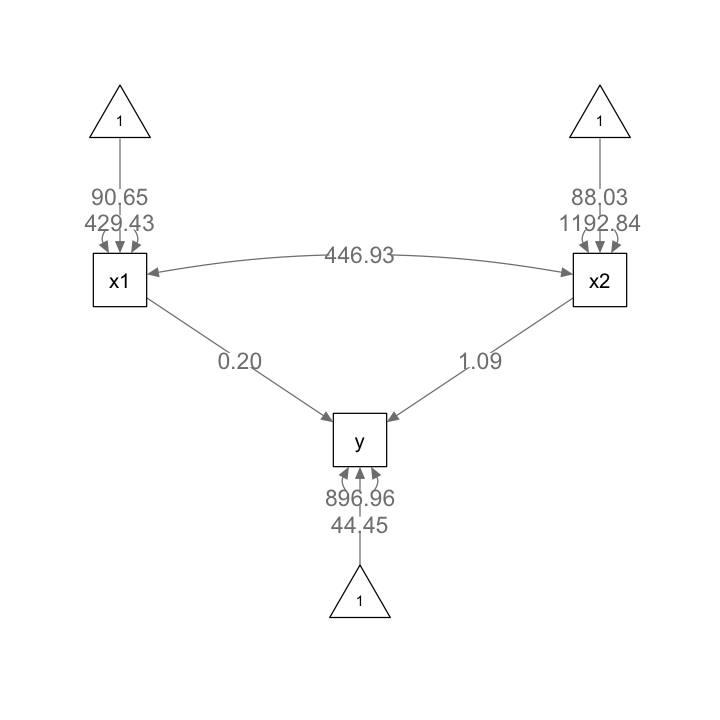

In [15]:
semPlot::semPaths(
    fit2b,
    layout = "tree", sizeMan = 7, sizeInt = 5, style = "ram",
    residuals = TRUE, intAtSide = FALSE, edge.label.cex = 1.15,
    whatLabels = "est", nCharNodes = 0, normalize = FALSE
)


## Effetti diretti e indiretti

L'analisi del percorso offre un metodo essenziale per distinguere tra diverse tipologie di effetti che influenzano le variabili in esame: l'effetto diretto, l'effetto indiretto e l'effetto totale. Gli effetti diretti rappresentano l'influenza che una variabile esercita su un'altra senza mediazione di altre variabili intermedie. Gli effetti indiretti, invece, operano attraverso l'intermediazione di almeno una variabile aggiuntiva nel processo. L'effetto totale è la somma cumulativa degli effetti diretti e indiretti.

Nella figura qui di seguito, la variabile $y_1$ esercita un effetto diretto sulla variabile $y_2$. Allo stesso tempo, $y_1$ produce un effetto indiretto sulla variabile $y_3$, poiché non esiste una connessione causale diretta tra $y_1$ e $y_3$. Nel contesto rappresentato, la variabile $y_1$ agisce come variabile esogena, mentre le variabili $y_2$ e $y_3v fungono da variabili endogene.

```{figure} images/path_03.png
---
height: 100px
name: path_03-fig
---
Diagramma di percorso per un modello a catena.
```

## Le regole di Wright

L'obiettivo primario dell'analisi del percorso consiste nella decomposizione della correlazione (o della covarianza) in base alla somma dei vari percorsi (diretti e indiretti) che collegano due variabili mediante coefficienti noti come "path coefficients." Utilizzando il diagramma del percorso, Sewall Wright (1921, 1934) formulò le regole che, tramite le "tracing rules," stabiliscono il collegamento tra le correlazioni (o covarianze) delle variabili e i parametri del modello. Le tracing rules si possono esprimere nei seguenti termini:

- È possibile procedere in avanti lungo una freccia e poi a ritroso, seguendo la direzione della freccia, ma non è permesso muoversi in avanti e poi tornare indietro.
- Un percorso composto non deve attraversare più di una volta la stessa variabile, cioè non possono esserci cicli.
- Un percorso non può contenere più di una linea curva.

Il termine "percorso" fa riferimento al tracciato che connette due variabili e si compone di sequenze di frecce unidirezionali e curve non direzionali. A ciascun percorso valido (cioè conforme alle regole di Wright) viene assegnato un valore numerico che rappresenta il prodotto dei coefficienti presenti lungo il percorso stesso. I coefficienti di percorso possono essere coefficienti parziali di regressione standardizzati se il legame è unidirezionale, oppure coefficienti di correlazione se il legame è bidirezionale.

## Scomposizione delle correlazioni/covarianze

Il principio fondamentale è stato formulato da Sewall Wright (1934) nel seguente modo:

> Ogni correlazione tra variabili in una rete di relazioni sequenziali può essere analizzata nei contributi provenienti da tutti i percorsi (diretti o attraverso fattori comuni) con i quali le due variabili sono connesse. Ogni contributo ha un valore pari al prodotto dei coefficienti relativi ai percorsi elementari. Se sono presenti correlazioni residue (rappresentate da frecce bidirezionali), uno (ma mai più di uno) dei coefficienti moltiplicati per ottenere il contributo del percorso di connessione può essere un coefficiente di correlazione. Gli altri sono tutti coefficienti di percorso.

Da questo principio possiamo derivare la regola di scomposizione della correlazione: la correlazione o covarianza tra due variabili può essere scomposta in un numero di termini uguale al numero di percorsi che le collegano. Ogni termine è ottenuto dal prodotto dei coefficienti associati alle variabili lungo il percorso. In altre parole, è possibile decomporre la correlazione o la covarianza tra due variabili in tanti contributi quanti sono i percorsi possibili che collegano le due variabili.

### Scomposizione della varianza

La decomposizione della varianza di una variabile endogena può essere affrontata attraverso una suddivisione in due componenti: una componente spiegata, attribuibile alle variabili che esercitano un'influenza causale su di essa, e una componente non spiegata. La componente spiegata della varianza deriva dall'aggregazione degli effetti delle diverse variabili che sono connessi alla variabile endogena, rispettando le regole di tracciamento definite da Wright. Il numero di addendi corrisponde al numero di percorsi che collegano la variabile endogena a se stessa. In tal modo, la varianza spiegata rappresenta la parte della varianza totale della variabile endogena che può essere attribuita alle influenze delle variabili correlate attraverso i percorsi definibili all'interno del modello.

**Esempio.** Consideriamo nuovamente il modello di regressione multipla con due variabili esogene e una sola variabile endogena che è stato presentato sopra. 

La calcoliamo la covarianza tra `y` e `x1` 

In [62]:
cov(dat$y, dat$x1) * 99 / 100


[1] 570.5647

può essere ricavata usando le regole di Wright nel modo seguente:

In [64]:
0.199 * 429.43 + 1.085 * 446.93


[1] 570.3756

La quota di varianza non spiegata della variabile endogena è:

In [65]:
(var(dat$y) * 99 / 100) - (
    0.199^2 * 429.43 + (1.085)^2 * 1192.84 + 2 * (0.199 * 1.085 * 446.93)
)


[1] 897.9361

## Commenti e considerazioni finali

Nel corso di questo capitolo introduttivo sull'analisi dei percorsi, abbiamo esplorato un rilevante approccio statistico finalizzato alla comprensione e all'analisi delle interazioni tra variabili all'interno di un sistema. La decomposizione della correlazione o della covarianza attraverso l'analisi dei percorsi fornisce un metodo agevolmente utilizzabile per descrivere le associazioni tra variabili, tracciando le loro connessioni causali ipotizzate.